In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your prepared flat dataset
df = pd.read_csv("F:/MySelf/ai-customer-care/data/chat_datasets/customer_care_dataset_flat.csv")

In [3]:
# Emotion labels
emotion_labels = {
    0: "no emotion",
    1: "anger",
    2: "disgust",
    3: "fear",
    4: "happiness",
    5: "sadness",
    6: "surprise"
}

# Map emotion index to text
df["emotion_label"] = df["emotion"].map(emotion_labels)

In [4]:
# 1. 🔍 Preview dataset
print("Shape:", df.shape)
print("Columns:", df.columns)
display(df.head())

Shape: (1731, 5)
Columns: Index(['turn', 'utterance', 'emotion', 'outcome', 'emotion_label'], dtype='object')


,turn,utterance,emotion,outcome,emotion_label
0,1,Agent: That’s not correct—I’m reviewing your b...,6,resolved,surprise
1,4,Customer: I'm disgusted by these careless bill...,2,resolved,disgust
2,2,Customer: Please ensure a car is available at ...,2,resolved,disgust
3,2,Customer: This is very sensitive information.,3,resolved,fear
4,2,Customer: I’m disgusted by these duplicate ent...,2,escalated,disgust


In [5]:
df["emotion"].value_counts()


emotion
1    294
3    287
5    253
0    250
4    250
6    239
2    158
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_25824\4058328575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="emotion_label", order=df["emotion_label"].value_counts().index, palette="viridis")


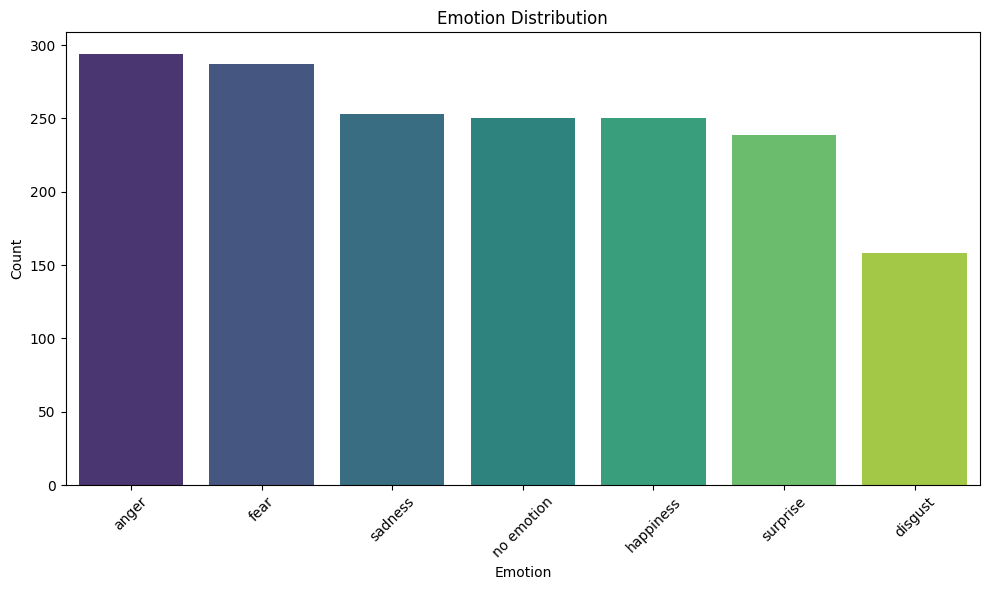

In [6]:
# Plot emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="emotion_label", order=df["emotion_label"].value_counts().index, palette="viridis")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25824\2171039361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="outcome", palette="pastel")


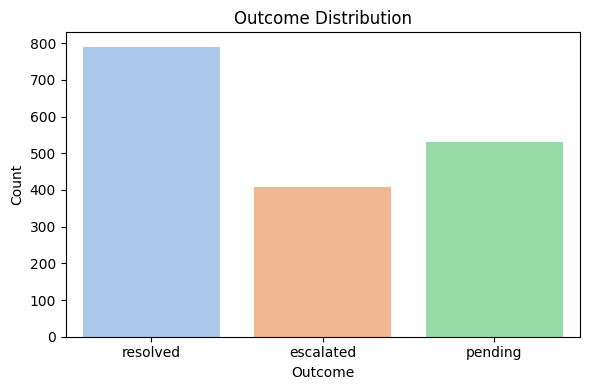

In [7]:
# Plot outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="outcome", palette="pastel")
plt.title("Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

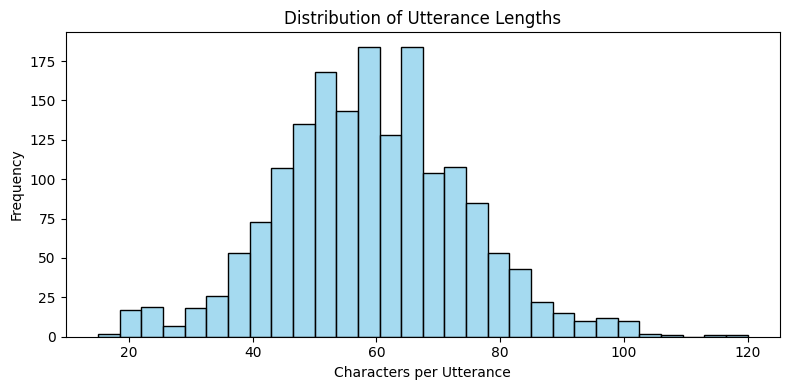

In [8]:
# 4. 📈 Utterance Length Distribution
df["length"] = df["utterance"].str.len()
plt.figure(figsize=(8, 4))
sns.histplot(df["length"], bins=30, color="skyblue")
plt.title("Distribution of Utterance Lengths")
plt.xlabel("Characters per Utterance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
# 📊 Crosstab: Emotion vs Outcome
pd.crosstab(df["emotion_label"], df["outcome"])

outcome,escalated,pending,resolved
emotion_label,,,
anger,110,124,60
disgust,44,70,44
fear,67,64,156
happiness,26,45,179
no emotion,59,92,99
sadness,69,59,125
surprise,34,78,127


C:\Users\DELL\AppData\Local\Temp\ipykernel_25824\3895446566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="emotion_label", y="length", palette="Set3")


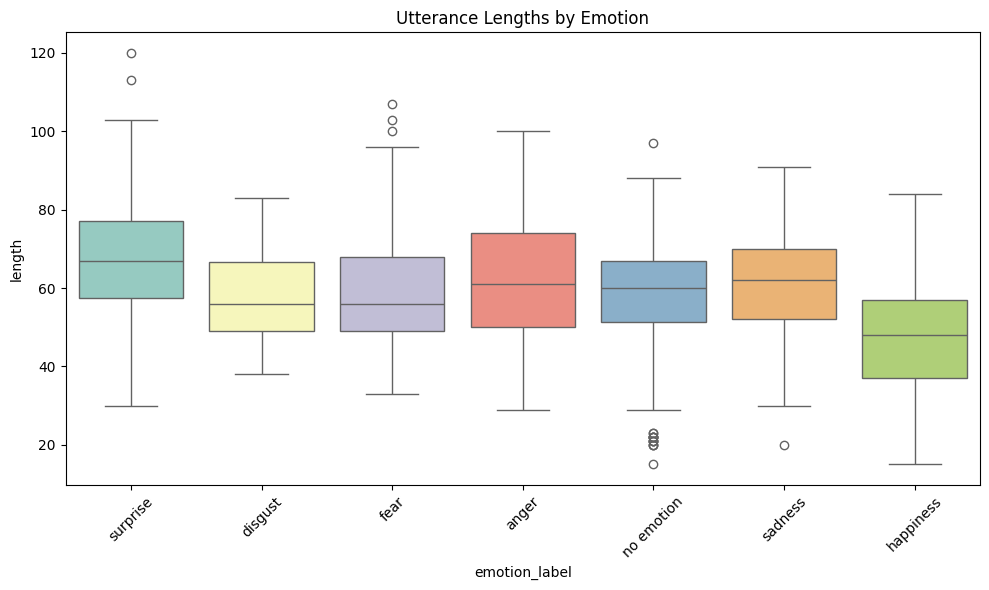

In [10]:
# 📈 Boxplot of Utterance Length by Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="emotion_label", y="length", palette="Set3")
plt.title("Utterance Lengths by Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# 🧠 Top Words per Emotion
from collections import Counter
import re

def top_words(df, label, n=10):
    text = " ".join(df[df["emotion_label"] == label]["utterance"])
    words = re.findall(r'\w+', text.lower())
    return Counter(words).most_common(n)

for label in df["emotion_label"].unique():
    print(f"🔹 Top words for {label}:")
    print(top_words(df, label))

🔹 Top words for surprise:
[('i', 213), ('customer', 150), ('m', 145), ('surprised', 105), ('agent', 90), ('the', 62), ('s', 59), ('your', 51), ('that', 49), ('to', 48)]
🔹 Top words for disgust:
[('i', 168), ('customer', 154), ('m', 139), ('disgusted', 131), ('by', 105), ('this', 104), ('is', 32), ('how', 23), ('your', 20), ('that', 20)]
🔹 Top words for fear:
[('customer', 242), ('i', 207), ('my', 100), ('m', 76), ('it', 69), ('the', 65), ('please', 47), ('agent', 46), ('you', 42), ('afraid', 39)]
🔹 Top words for anger:
[('customer', 292), ('i', 265), ('my', 85), ('this', 85), ('m', 81), ('is', 68), ('on', 56), ('the', 49), ('for', 48), ('2026', 45)]
🔹 Top words for no emotion:
[('agent', 232), ('i', 187), ('the', 109), ('to', 65), ('m', 57), ('ll', 56), ('you', 50), ('and', 46), ('for', 44), ('understood', 40)]
🔹 Top words for sadness:
[('i', 292), ('agent', 159), ('m', 139), ('customer', 94), ('the', 78), ('this', 58), ('to', 53), ('your', 51), ('and', 51), ('that', 50)]
🔹 Top words f